In [32]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import h5py as h5

def read_dim_fromfile(name):
    file = h5.File(name, "r")
    Nx = int(file.get("LBE3D").attrs["lbe_sx"][0])
    Ny = int(file.get("LBE3D").attrs["lbe_sy"][0])
    Nz = int(file.get("LBE3D").attrs["lbe_sz"][0])
    print(Nx,Ny,Nz)
    return Nx, Ny,Nz
    file.close()

def read_field_fromfile(name, field):
    file = h5.File(name, "r")
    f = np.zeros((Nx,Ny,Nz))
    name_field="/LBE3D/"+field
    f[:,:,:] = file.get(str(name_field))[...]
    file.close()
    return f
    
direc = "/home/matti/programming/lbe-direct/src/tests/CG22_jetting_with_particle/RUN/"

name=direc+"flag.h5"
Nx,Ny,Nz = read_dim_fromfile(name)
flaggeometry = read_field_fromfile(name, "flag")

name=direc+"flag_geo.h5"
flag = read_field_fromfile(name, "flag")

name=direc+"density_CG_t.0.h5"
rhoN0 = read_field_fromfile(name, "rhoN")
name=direc+"density_CG_t.1.h5"
rhoN1 = read_field_fromfile(name, "rhoN")
name=direc+"density_CG_t.2.h5"
rhoN2 = read_field_fromfile(name, "rhoN")

40 20 20


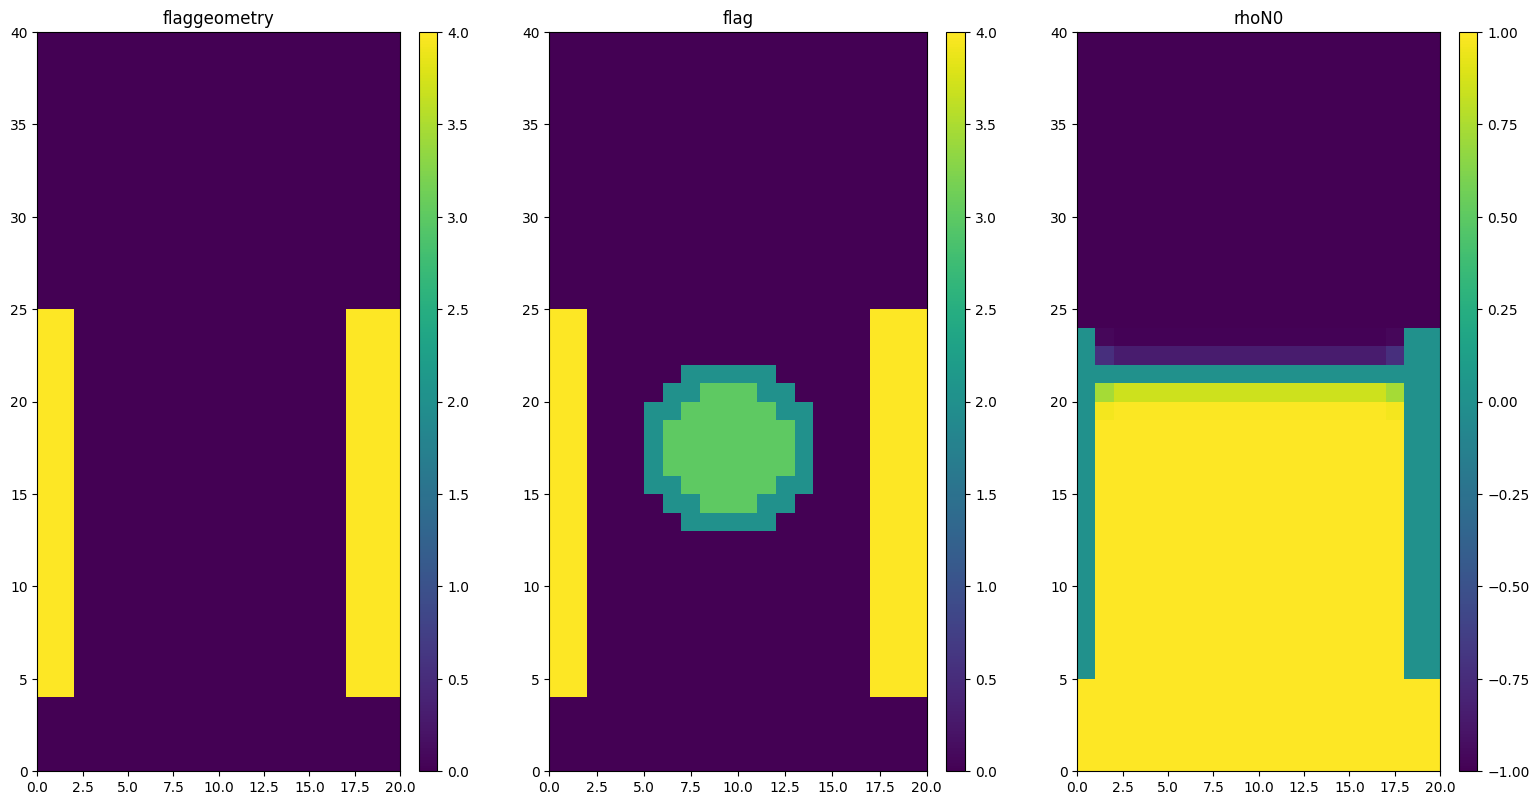

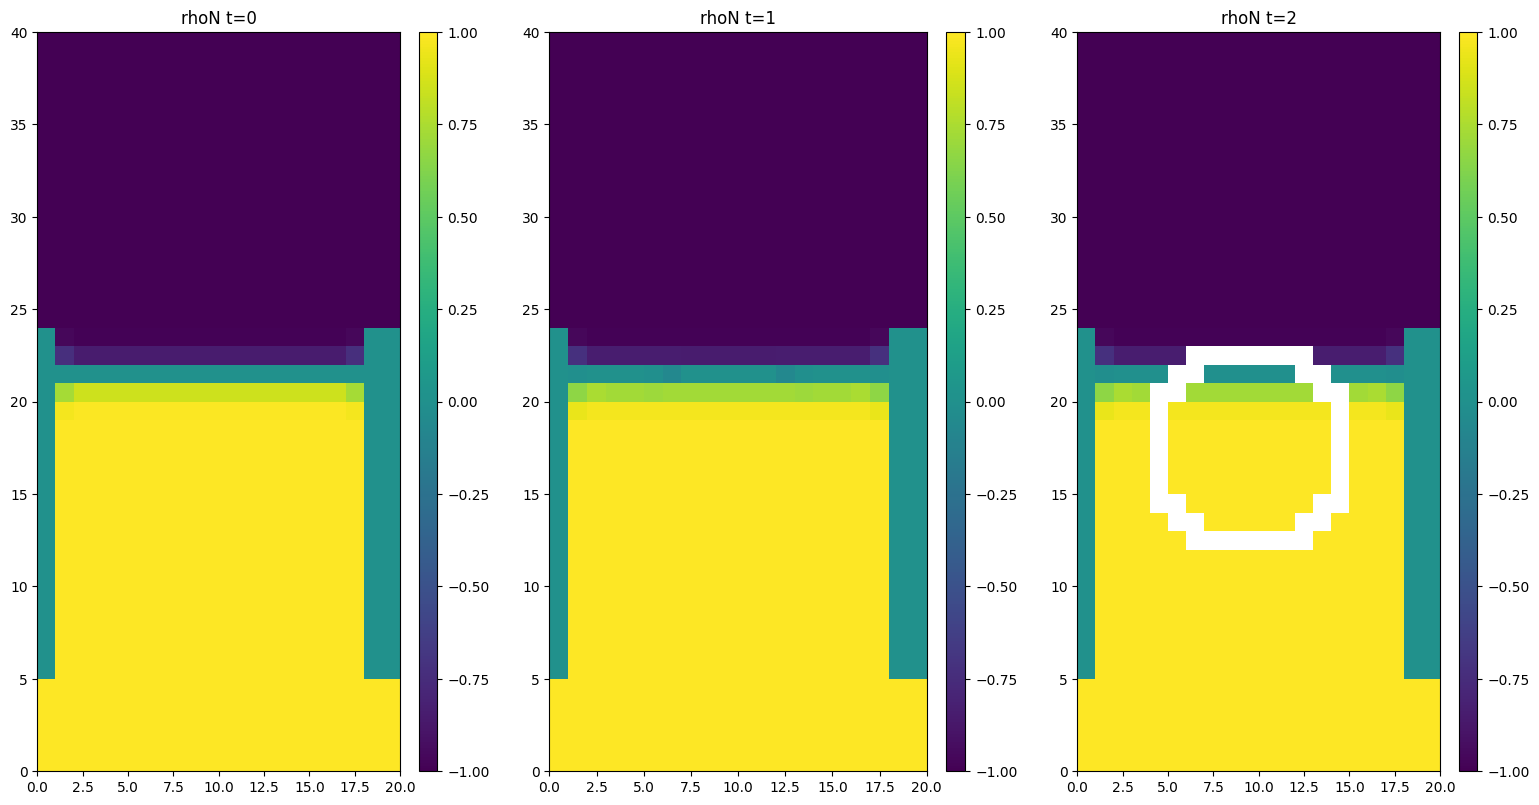

In [44]:
def plot_f(i, f, title):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.pcolormesh(f[:,:,10])
    _ = plt.colorbar()
    _ = plt.grid()
    _ = plt.xticks((np.linspace(0,Ny,Ny+1,dtype=np.int16)))
    _ = plt.yticks((np.linspace(0,Nx,Nx+1,dtype=np.int16)))
    _ = plt.title(title)

def plot_3f(f1, f2, f3, i, title1, title2, title3):
    n=1 ; COL=2 ; RIG=1 ; cut = 10
    fig = plt.figure(i, figsize=[n*8*COL,n*4.8*2*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.3)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.37, right=0.63)#, hspace=0)
    axs2 = gs2.subplots()
    gs3 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.7, right=0.95)#, hspace=0)
    axs3 = gs3.subplots()
    vm = np.min(f1[:,:,cut]); vM = np.max(f1[:,:,cut])
    C = axs1[0].pcolormesh(f1[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(title1)
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f2[:,:,cut]); vM = np.max(f2[:,:,cut])
    C = axs2[0].pcolormesh(f2[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(title2)
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    #vm = np.min(f3[:,:,cut]); vM = np.max(f3[:,:,cut])
    vm = -1; vM = +1
    C = axs3[0].pcolormesh(f3[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs3[0].set_title(title3)
    _ = matplotlib.colorbar.ColorbarBase(axs3[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)

# plot_f(1,flaggeometry,"flaggeometry")
# plot_f(2,flag,"flag")
# plot_f(3,rhoN,"rhoN")
plot_3f(flaggeometry, flag, rhoN0, 1, "flaggeometry", "flag", "rhoN0")
plot_3f(rhoN0, rhoN1, rhoN2, 2, "rhoN t=0", "rhoN t=1", "rhoN t=2")

In [51]:
rhoN0[:,1,10]

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        9.99999999e-01,  9.99999989e-01,  9.99999864e-01,  9.99998342e-01,
        9.99979797e-01,  9.99753968e-01,  9.97016879e-01,  9.65605878e-01,
        7.29958139e-01,  4.68375339e-16, -7.29958139e-01, -9.65605878e-01,
       -9.98331572e-01, -9.99909204e-01, -9.99992547e-01, -9.99999388e-01,
       -9.99999950e-01, -9.99999996e-01, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00])